In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos los datos sobre hechos y víctimas de los archivos `homicidios.xlsx` y `lesiones.xlsx`. Tambien los datos de población del archivo `poblacion.xlsx`.

In [278]:
homicidios_hechos = pd.read_excel('Datasets\homicidios.xlsx', sheet_name="HECHOS")
homicidios_victimas = pd.read_excel('Datasets\homicidios.xlsx', sheet_name="VICTIMAS")
lesiones_hechos = pd.read_excel('Datasets\lesiones.xlsx', sheet_name="HECHOS")
lesiones_victimas = pd.read_excel('Datasets\lesiones.xlsx', sheet_name="VICTIMAS")
poblacion = pd.read_excel('Datasets\poblacion.xlsx', sheet_name="DATOS")

Visualizamos los DataFrames

In [279]:
homicidios_hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [280]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [281]:
homicidios_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


In [282]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [283]:
lesiones_hechos.head(3)

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [284]:
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [285]:
lesiones_victimas.head(3)

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD


In [286]:
lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [287]:
poblacion.head(3)

,COMUNA,AAAA,TOTAL,MASCULINO,FEMENINO
0,1,2016,252053,124045,128008
1,1,2017,253271,125021,128250
2,1,2018,254408,125950,128458


In [288]:
poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   COMUNA     90 non-null     int64
 1   AAAA       90 non-null     int64
 2   TOTAL      90 non-null     int64
 3   MASCULINO  90 non-null     int64
 4   FEMENINO   90 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


### `homicidios_hechos`

In [289]:
# Convertimos los valores de la columna 'comuna' al tipo 'category'. Ya que, aunque sean valores numéricos, no son variables cuantitativas sino nominales.
homicidios_hechos['COMUNA'] = homicidios_hechos['COMUNA'].astype('category')

# Reemplazamos los valores '.' de la columnas 'pos x' y 'pos y' por valores vacíos
homicidios_hechos['pos x'].replace('.', np.nan, inplace=True)
homicidios_hechos['pos y'].replace('.', np.nan, inplace=True)

# Convertimos los valores de las columnas 'pos x' y 'pos y' de coordenadas a formato numérico
homicidios_hechos['pos x'] = pd.to_numeric(homicidios_hechos['pos x'])
homicidios_hechos['pos y'] = pd.to_numeric(homicidios_hechos['pos y'])

# Reemplazamos los valores 'SD' por valores vacíos
homicidios_hechos = homicidios_hechos.replace('SD', pd.NA)

# Cambiamos el nombre de las columnas
homicidios_hechos = homicidios_hechos.rename(columns = {'Calle': 'CALLE', 'Altura': 'ALTURA', 'Cruce': 'CRUCE', 'Dirección Normalizada': 'DIRECCION_NORMALIZADA', 'XY (CABA)': 'GEOCODIFICACION', 'pos x': 'LONGITUD', 'pos y': 'LATITUD'})

print(homicidios_hechos.dtypes)

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
CALLE                            object
ALTURA                          float64
CRUCE                            object
DIRECCION_NORMALIZADA            object
COMUNA                         category
GEOCODIFICACION                  object
LONGITUD                        float64
LATITUD                         float64
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object


In [290]:
# Creamos una funcion que crea una nueva columna llamada 'DENTRO_CABA'. Los datos asumen valores booleanos de acuerdo a si las coordenadas estan dentro de los límites de la ciudad.
def dentro_caba(df):
    limite_superior_latitud = -34.2
    limite_inferior_latitud = -34.9
    limite_izquierdo_longitud = -58.5
    limite_derecho_longitud = -58.2

    df['DENTRO_CABA'] = (
        (df['LATITUD'] >= limite_inferior_latitud) &
        (df['LATITUD'] <= limite_superior_latitud) &
        (df['LONGITUD'] >= limite_izquierdo_longitud) &
        (df['LONGITUD'] <= limite_derecho_longitud)
    )

# Aplicamos la función al DataFrame 'homicidios_hechos'
dentro_caba(homicidios_hechos)

# Filtramos el DataFrame para mantener solo las filas dentro de la CABA
homicidios_hechos = homicidios_hechos[homicidios_hechos['DENTRO_CABA']]

# Eliminamos las columna 'DENTRO_CABA', 'GEOCODIFICACION' y 'PARTICIPANTES'
homicidios_hechos.drop(columns=['DENTRO_CABA'], inplace=True)
homicidios_hechos.drop(columns=['GEOCODIFICACION'], inplace=True)
homicidios_hechos.drop(columns=['PARTICIPANTES'], inplace=True)

# Reindexamos
homicidios_hechos.reset_index(drop=True, inplace=True)


In [291]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     604 non-null    object        
 1   N_VICTIMAS             604 non-null    int64         
 2   FECHA                  604 non-null    datetime64[ns]
 3   AAAA                   604 non-null    int64         
 4   MM                     604 non-null    int64         
 5   DD                     604 non-null    int64         
 6   HORA                   604 non-null    object        
 7   HH                     604 non-null    object        
 8   LUGAR_DEL_HECHO        604 non-null    object        
 9   TIPO_DE_CALLE          604 non-null    object        
 10  CALLE                  604 non-null    object        
 11  ALTURA                 113 non-null    float64       
 12  CRUCE                  466 non-null    object        
 13  DIREC

In [292]:
# Vemos qué valores pueden asumir algunas columnas
valores_unicos1 = homicidios_hechos['N_VICTIMAS'].dropna().unique()
print(valores_unicos1)
valores_unicos2 = homicidios_hechos['COMUNA'].dropna().unique()
print(valores_unicos2)
valores_unicos3 = homicidios_hechos['VICTIMA'].dropna().unique()
print(valores_unicos3)
valores_unicos4 = homicidios_hechos['ACUSADO'].dropna().unique()
print(valores_unicos4)

[1 2 3]
[8, 1, 15, 4, 7, ..., 6, 2, 5, 9, 11]
Length: 15
Categories (16, int64): [0, 1, 2, 3, ..., 12, 13, 14, 15]
['MOTO' 'PEATON' 'AUTO' 'BICICLETA' 'PASAJEROS' 'MOVIL' 'CARGAS'
 'OBJETO FIJO']
['AUTO' 'PASAJEROS' 'OBJETO FIJO' 'CARGAS' 'MOTO' 'MULTIPLE' 'OTRO'
 'BICICLETA' 'TREN']


In [293]:
# Cambiamos los valores que no deben estar en la columna
homicidios_hechos.replace('PEATON_MOTO', 'MOTO', inplace=True)

In [294]:
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,ALTURA,CRUCE,DIRECCION_NORMALIZADA,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,-58.475340,-34.687570,MOTO,AUTO
1,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,-58.390403,-34.631894,MOTO,AUTO
2,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,-58.465039,-34.680930,MOTO,<NA>
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,-58.387183,-34.622466,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,-58.444513,-34.684759,MOTO,OBJETO FIJO


### `homicidios_victimas`

In [295]:
# Reemplazamos los valores 'SD' por valores vacíos
homicidios_victimas['FECHA_FALLECIMIENTO'].replace('SD', pd.NaT, inplace=True)

# Convertimos el tipo de dato de la columna 'FECHA_FALLECIMIENTO' a 'datetime64[ns]'
homicidios_victimas['FECHA_FALLECIMIENTO'] = homicidios_victimas['FECHA_FALLECIMIENTO'].astype('datetime64[ns]')

# Reemplazamos los valores 'SD' por valores vacíos
homicidios_victimas = homicidios_victimas.replace('SD', pd.NA)

# Convertimos las edades a formato numérico
homicidios_victimas['EDAD'] = pd.to_numeric(homicidios_victimas['EDAD'])

# Cambiamos el nombre a la columna 'ROL', 'SEXO' y 'EDAD'
homicidios_victimas = homicidios_victimas.rename(columns = {'ROL': 'ROL_VICTIMA', 'SEXO': 'SEXO_VICTIMA', 'EDAD': 'EDAD_VICTIMA'})


print(homicidios_victimas.dtypes)

ID_hecho                       object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL_VICTIMA                    object
VICTIMA                        object
SEXO_VICTIMA                   object
EDAD_VICTIMA                  float64
FECHA_FALLECIMIENTO    datetime64[ns]
dtype: object


In [296]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL_VICTIMA          706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO_VICTIMA         711 non-null    object        
 8   EDAD_VICTIMA         664 non-null    float64       
 9   FECHA_FALLECIMIENTO  649 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 56.1+ KB


In [297]:
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL_VICTIMA,VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,NaT
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01


### `lesiones_hechos`

In [298]:
lesiones_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

In [299]:
# Reemplazamos los valores 'SD' de la columna 'comuna' por valores vacíos
lesiones_hechos['comuna'].replace('No Especificada', np.nan, inplace=True)
lesiones_hechos['comuna'].replace('SD', np.nan, inplace=True)

# Convertimos los valores de la columna 'comuna' a formato float, completamos los valores 'NaN' con ceros y lo pasamos a formato entero
lesiones_hechos['comuna'] = pd.to_numeric(lesiones_hechos['comuna'])
lesiones_hechos.fillna(0, inplace=True)
lesiones_hechos['comuna'] = lesiones_hechos['comuna'].astype(int)

# Convertimos los valores de la columna 'comuna' al tipo 'category'. Ya que, aunque sean valores numéricos, no indican no son variables cuantitativas sino nominales.
lesiones_hechos['comuna'] = lesiones_hechos['comuna'].astype('category')

# Cambiamos el nombre de la columna 'latutid' por 'latitud'
lesiones_hechos = lesiones_hechos.rename(columns={'latutid': 'latitud'})

# Reemplazamos los valores 'SD' de las columnas 'longitud' y 'latitud' por valores vacíos
lesiones_hechos['longitud'].replace('SD', np.nan, inplace=True)
lesiones_hechos['latitud'].replace('SD', np.nan, inplace=True)

# Convertimos los valores de las columnas 'longitud' y 'latitud' a formato numérico
lesiones_hechos['longitud'] = pd.to_numeric(lesiones_hechos['longitud'])
lesiones_hechos['latitud'] = pd.to_numeric(lesiones_hechos['latitud'])

# Eliminamos las columnas 'participantes', 'moto', 'auto', 'transporte_publico', 'camion' y 'ciclista', porque indican participación de ese tipo de vehículo, sea víctima u acusado. Y este dato ya lo tenemos en las columnas 'victima' y 'acusado'.
lesiones_hechos.drop(columns=['participantes'], inplace=True)
lesiones_hechos.drop(columns=['moto'], inplace=True)
lesiones_hechos.drop(columns=['auto'], inplace=True)
lesiones_hechos.drop(columns=['transporte_publico'], inplace=True)
lesiones_hechos.drop(columns=['camion'], inplace=True)
lesiones_hechos.drop(columns=['ciclista'], inplace=True)

# Convertimos el tipo de dato de la columna 'fecha' a ' datetime64[ns]'
lesiones_hechos['fecha'] = pd.to_datetime(lesiones_hechos['fecha'])

# Reemplazamos los valores 'sd' de la columna 'franja_hora' por valores vacíos, luego, a esos valores vacíos los llenamos con '0' y convertimos los valores a int
lesiones_hechos['franja_hora'].replace('sd', np.nan, inplace=True)
lesiones_hechos['franja_hora'] = pd.to_numeric(lesiones_hechos['franja_hora'])
lesiones_hechos.fillna(0, inplace=True)
lesiones_hechos['franja_hora'] = lesiones_hechos['franja_hora'].astype(int)

lesiones_hechos = lesiones_hechos.rename(columns ={'id': 'ID', 'n_victimas': 'N_VICTIMAS', 'aaaa': 'AAAA', 'mm': 'MM', 'dd': 'DD', 'fecha': 'FECHA', 'hora': 'HORA', 'franja_hora': 'FRANJA_HORA', 'direccion_normalizada': 'DIRECCION_NORMALIZADA', 'comuna': 'COMUNA', 'tipo_calle': 'TIPO_CALLE', 'otra_direccion': 'OTRA_DIRECCION', 'calle': 'CALLE', 'altura': 'ALTURA', 'cruce': 'CRUCE', 'geocodificacion_CABA': 'GEOCODIFICACION', 'longitud': 'LONGITUD', 'latitud': 'LATITUD', 'victima': 'VICTIMA', 'acusado': 'ACUSADO', 'gravedad': 'GRAVEDAD'})


print(lesiones_hechos.dtypes)

ID                               object
N_VICTIMAS                        int64
AAAA                              int64
MM                                int64
DD                                int64
FECHA                    datetime64[ns]
HORA                             object
FRANJA_HORA                       int32
DIRECCION_NORMALIZADA            object
COMUNA                         category
TIPO_CALLE                       object
OTRA_DIRECCION                   object
CALLE                            object
ALTURA                          float64
CRUCE                            object
GEOCODIFICACION                  object
LONGITUD                        float64
LATITUD                         float64
VICTIMA                          object
ACUSADO                          object
GRAVEDAD                         object
dtype: object


In [300]:
# Aplicamos la función de geocodificación al DataFrame 'lesiones_hechos' para separar valores que esten fuera de los límites de la ciudad.
dentro_caba(lesiones_hechos)

# Filtramos el DataFrame para mantener solo las filas dentro de la CABA
lesiones_hechos = lesiones_hechos[lesiones_hechos['DENTRO_CABA']]

# Eliminamos las columna 'DENTRO_CABA'
lesiones_hechos.drop(columns=['DENTRO_CABA'], inplace=True)

# Reindexamos
lesiones_hechos.reset_index(drop=True, inplace=True)

In [301]:
# Vemos qué valores pueden asumir algunas columnas
valores_unicos1 = lesiones_hechos['N_VICTIMAS'].dropna().unique()
print(valores_unicos1)
valores_unicos2 = lesiones_hechos['COMUNA'].dropna().unique()
print(valores_unicos2)
valores_unicos3 = lesiones_hechos['VICTIMA'].dropna().unique()
print(valores_unicos3)
valores_unicos4 = lesiones_hechos['ACUSADO'].dropna().unique()
print(valores_unicos4)
valores_unicos5 = lesiones_hechos['GRAVEDAD'].dropna().unique()
print(valores_unicos5)

[ 1  4  2  5  3 10  6  8 16  7]
[14, 8, 7, 3, 15, ..., 13, 11, 10, 9, 0]
Length: 16
Categories (16, int32): [0, 1, 2, 3, ..., 12, 13, 14, 15]
['CICLISTA' 'AUTO' 'SD' 'PEATON' 'MOTO' 'TRANSPORTE PUBLICO' 'CAMIONETA'
 'MOVIL' 'OTRO' 'CAMION' 'UTILITARIO' 'TAXI' 'MIXTO' 'MONOPATIN']
['SD' 'AUTO' 'CICLISTA' 'MOVIL' 'CAMIONETA' 'MOTO' 'TAXI'
 'TRANSPORTE PUBLICO' 'CAMION' 'OBJETO FIJO' 'OTRO' 'UTILITARIO'
 'MONOPATIN' 'PEATON']
['SD' 'sd' 'GRAVE' 'grave' 'FATAL']


In [302]:
# Normalizamos algunos valores
lesiones_hechos['GRAVEDAD'].replace('grave', 'GRAVE', inplace=True)
lesiones_hechos.replace('sd', 'SD', inplace=True)

lesiones_hechos = lesiones_hechos.replace('SD', pd.NA)

lesiones_hechos.head()

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,HORA,FRANJA_HORA,DIRECCION_NORMALIZADA,COMUNA,...,OTRA_DIRECCION,CALLE,ALTURA,CRUCE,GEOCODIFICACION,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD
0,LC-2019-0000179,1,2019,1,1,2019-01-01,09:00:00,9,<NA>,14,...,"Obligado Rafael, Av.Costanera 3300, Barrio: Pa...",0,0.0,0,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,<NA>,<NA>
1,LC-2019-0000053,1,2019,1,1,2019-01-01,01:55:00,1,<NA>,8,...,"Autopista Presidente Héctor J. Cámpora y Roca,...",0,0.0,0,Point (101813.84712503915943671 95578.55507230...,-58.443510,-34.669125,AUTO,<NA>,<NA>
2,LC-2019-0000063,1,2019,1,1,2019-01-01,02:00:00,2,<NA>,8,...,"Barros Pazos, Jose y Larraya 0, Barrio: Villa ...",0,0.0,0,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,<NA>,<NA>,<NA>
3,LC-2019-0000079,1,2019,1,1,2019-01-01,02:30:00,2,<NA>,7,...,"Torres Y Tenorio, Pres. y Riestra Av. 0, Barri...",0,0.0,0,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,<NA>,<NA>
4,LC-2019-0000082,4,2019,1,1,2019-01-01,04:30:00,4,<NA>,3,...,"Corrientes Av. y Uriburu Jose E., Pres. 0, Bar...",0,0.0,0,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,<NA>,<NA>


In [303]:
# Eliminamos las filas con valores NA en las columnas 'VICTIMA' y 'ACUSADO'
lesiones_hechos = lesiones_hechos.dropna(subset=['VICTIMA', 'ACUSADO'])

# Reindexamos
lesiones_hechos.reset_index(drop=True, inplace=True)

In [304]:
lesiones_hechos.head()

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,HORA,FRANJA_HORA,DIRECCION_NORMALIZADA,COMUNA,...,OTRA_DIRECCION,CALLE,ALTURA,CRUCE,GEOCODIFICACION,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD
0,LC-2020-0002346,1,2020,1,2,2020-01-02,01:00:00 p.m.,13,ALVEAR AV. y AYACUCHO,2,...,<NA>,ALVEAR AV.,0.0,AYACUCHO,Point (106797.883397132 104615.00964936),-58.389203,-34.587646,CICLISTA,AUTO,<NA>
1,LC-2020-0003142,1,2020,1,2,2020-01-02,04:15:00 p.m.,16,CASTELLI 147,3,...,<NA>,CASTELLI,147.0,0,Point (105393.859084365 102333.999776285),-58.404493,-34.608217,CICLISTA,AUTO,<NA>
2,LC-2020-0004057,1,2020,1,3,2020-01-03,03:20:00 a.m.,3,GURRUCHAGA y MUÃ‘ECAS,15,...,<NA>,GURRUCHAGA,0.0,MUÃ‘ECAS,Point (101609.477757533 103183.144235567),-58.445754,-34.600575,CICLISTA,AUTO,<NA>
3,LC-2020-0005389,1,2020,1,3,2020-01-03,01:30:00 p.m.,13,LAS HERAS GENERAL AV. 3453,14,...,<NA>,LAS HERAS GENERAL AV.,3453.0,0,Point (105012.522254721 105185.455369613),-58.408667,-34.582514,MOTO,CICLISTA,<NA>
4,LC-2020-0006408,1,2020,1,3,2020-01-03,09:30:00 p.m.,21,"GANDARA y VICTORICA, BENJAMIN, GENERAL, AV.",15,...,<NA>,GANDARA,0.0,"VICTORICA, BENJAMIN, GENERAL, AV.",Point (98536.5406498828 105187.697470956),-58.479250,-34.582505,CICLISTA,MOVIL,<NA>


### `lesiones_victimas`

In [305]:
lesiones_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27605 entries, 0 to 27604
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID hecho          27605 non-null  object        
 1   AAA               27605 non-null  int64         
 2   MM                27605 non-null  int64         
 3   DD                27605 non-null  int64         
 4   FECHA             27605 non-null  datetime64[ns]
 5   VEHICULO_VICTIMA  27605 non-null  object        
 6   SEXO              27605 non-null  object        
 7   EDAD_VICTIMA      27605 non-null  object        
 8   GRAVEDAD          27605 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 1.9+ MB


In [306]:
valores_unicos1 = lesiones_victimas['VEHICULO_VICTIMA'].dropna().unique()
print(valores_unicos1)
valores_unicos2 = lesiones_victimas['SEXO'].dropna().unique()
print(valores_unicos2)
valores_unicos3 = lesiones_victimas['GRAVEDAD'].dropna().unique()
print(valores_unicos3)


['sd' 'MOTO' 'AUTO' 'TAXI' 'PEATON' 'CICLISTA' 'SD' 'TRANSPORTE PUBLICO'
 'MOVIL' 'CAMION' 'UTILITARIO' 'MONOPATIN' 'MIXTO' 'OTRO']
['Varon' 'SD' 'Mujer' 'varon' 'mujer' 'MUJER' 'sd' 'Mujer ']
['SD' 'sd' 'GRAVE' 'grave']


In [307]:
# Cambiamos el nombre a la columna 'SEXO'
lesiones_victimas = lesiones_victimas.rename(columns = { 'SEXO': 'SEXO_VICTIMA'})

# Normalizamos algunos valores
lesiones_victimas['GRAVEDAD'].replace('grave', 'GRAVE', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('varon', 'MASCULINO', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('Varon', 'MASCULINO', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('Mujer', 'FEMENINO', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('Mujer ', 'FEMENINO', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('mujer', 'FEMENINO', inplace=True)
lesiones_victimas['SEXO_VICTIMA'].replace('MUJER', 'FEMENINO', inplace=True)
lesiones_victimas.replace('sd', 'SD', inplace=True)
lesiones_victimas = lesiones_victimas.replace('SD', pd.NA)

# Reemplazamos los valores 'SD' por valores vacíos
lesiones_victimas['EDAD_VICTIMA'].replace('SD', np.nan, inplace=True)

# Convertimos las edades a formato numérico
lesiones_victimas['EDAD_VICTIMA'] = pd.to_numeric(lesiones_victimas['EDAD_VICTIMA'])



In [308]:
lesiones_victimas.head()

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,<NA>,MASCULINO,57.0,<NA>
1,LC-2019-0000063,2019,1,1,2019-01-01,<NA>,<NA>,NaN,<NA>
2,LC-2019-0000079,2019,1,1,2019-01-01,<NA>,MASCULINO,NaN,<NA>
3,LC-2019-0000082,2019,1,1,2019-01-01,<NA>,MASCULINO,45.0,<NA>
4,LC-2019-0000082,2019,1,1,2019-01-01,<NA>,FEMENINO,45.0,<NA>


## **Merge**

In [309]:
# Creamos un nuevo dataframe donde mergeamos los DataFrames 'homicidios_hechos' y 'homicidios_victimas' a través del ID del hecho
homicidios_merge = pd.merge(homicidios_hechos, homicidios_victimas, left_on='ID', right_on='ID_hecho', how='inner')

homicidios_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     620 non-null    object        
 1   N_VICTIMAS             620 non-null    int64         
 2   FECHA_x                620 non-null    datetime64[ns]
 3   AAAA_x                 620 non-null    int64         
 4   MM_x                   620 non-null    int64         
 5   DD_x                   620 non-null    int64         
 6   HORA                   620 non-null    object        
 7   HH                     620 non-null    object        
 8   LUGAR_DEL_HECHO        620 non-null    object        
 9   TIPO_DE_CALLE          620 non-null    object        
 10  CALLE                  620 non-null    object        
 11  ALTURA                 116 non-null    float64       
 12  CRUCE                  478 non-null    object        
 13  DIREC

In [310]:
# Creamos un nuevo dataframe donde mergeamos los DataFrames 'lesiones_hechos' y 'lesiones_victimas' a través del ID del hecho
lesiones_merge = pd.merge(lesiones_hechos, lesiones_victimas, left_on='ID', right_on='ID hecho', how='inner')

lesiones_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941 entries, 0 to 7940
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     7941 non-null   object        
 1   N_VICTIMAS             7941 non-null   int64         
 2   AAAA                   7941 non-null   int64         
 3   MM_x                   7941 non-null   int64         
 4   DD_x                   7941 non-null   int64         
 5   FECHA                  7941 non-null   datetime64[ns]
 6   HORA                   7941 non-null   object        
 7   FRANJA_HORA            7941 non-null   int32         
 8   DIRECCION_NORMALIZADA  7818 non-null   object        
 9   COMUNA                 7941 non-null   category      
 10  TIPO_CALLE             7843 non-null   object        
 11  OTRA_DIRECCION         23 non-null     object        
 12  CALLE                  7941 non-null   object        
 13  ALT

### Limpieza de filas y columnas post-merge

In [311]:
# Renombramos algunas columnas que cambiaron su nombre por el Merge en el DataFrame de homicidios
homicidios_merge = homicidios_merge.rename(columns ={'FECHA_x': 'FECHA', 'AAAA_x': 'AAAA', 'MM_x': 'MM', 'DD_x': 'DD', 'VICTIMA_x': 'VICTIMA'}) 

# Eliminamos columnas duplicadas e innecesarias en el DataFrame de homicidios
homicidios_merge.drop(columns=['ID_hecho'], inplace=True)
homicidios_merge.drop(columns=['FECHA_y'], inplace=True)
homicidios_merge.drop(columns=['AAAA_y'], inplace=True)
homicidios_merge.drop(columns=['MM_y'], inplace=True)
homicidios_merge.drop(columns=['DD_y'], inplace=True)
homicidios_merge.drop(columns=['VICTIMA_y'], inplace=True)

In [312]:
# Renombramos algunas columnas que cambiaron su nombre por el Merge en el DataFrame de lesiones
lesiones_merge = lesiones_merge.rename(columns ={'MM_x': 'MM', 'DD_x': 'DD', 'FRANJA_HORA': 'HH' , 'TIPO_CALLE': 'TIPO_DE_CALLE', 'GRAVEDAD_x': 'GRAVEDAD'}) 

# Eliminamos columnas duplicadas e innecesarias en el DataFrame de lesiones
lesiones_merge.drop(columns=['ID hecho'], inplace=True)
lesiones_merge.drop(columns=['AAA'], inplace=True)
lesiones_merge.drop(columns=['MM_y'], inplace=True)
lesiones_merge.drop(columns=['DD_y'], inplace=True)
lesiones_merge.drop(columns=['GEOCODIFICACION'], inplace=True)
lesiones_merge.drop(columns=['OTRA_DIRECCION'], inplace=True)
lesiones_merge.drop(columns=['GRAVEDAD_y'], inplace=True)
lesiones_merge.drop(columns=['VEHICULO_VICTIMA'], inplace=True)
lesiones_merge.drop(columns=['FECHA '], inplace=True)

In [313]:
# En el DataFrame de homicidios, creamos una columna nueva que se llama 'DIA' que contiene el nombre del día de la semana
homicidios_merge['DIA'] = homicidios_merge['FECHA'].dt.strftime('%A')

# Creamos un diccionario para cambiar de idioma los días de la semana y lo aplicamos a la columna nueva
dia={  'Friday':'Viernes',
       'Saturday': 'Sabado',
       'Sunday': 'Domingo',  
       'Thursday': 'Jueves',
        'Monday': 'Lunes',
        'Wednesday': 'Miercoles',
       'Tuesday': 'Martes'}
homicidios_merge['DIA'] =homicidios_merge['DIA'].replace(dia)

homicidios_merge.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO,DIA
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,8,-58.475340,-34.687570,MOTO,AUTO,CONDUCTOR,MASCULINO,19.0,2016-01-01,Viernes
1,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,1,-58.390403,-34.631894,MOTO,AUTO,CONDUCTOR,MASCULINO,30.0,2016-01-03,Domingo


In [314]:
# En el DataFrame de lesiones, creamos una columna nueva que se llama 'DIA' que contiene el nombre del día de la semana
lesiones_merge['DIA'] = lesiones_merge['FECHA'].dt.strftime('%A')

# Aplicamos el diccionario para cambiar de idioma los días de la semana a la columna nueva
lesiones_merge['DIA'] =lesiones_merge['DIA'].replace(dia)

lesiones_merge.head(2)

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,HORA,HH,DIRECCION_NORMALIZADA,COMUNA,...,ALTURA,CRUCE,LONGITUD,LATITUD,VICTIMA,ACUSADO,GRAVEDAD,SEXO_VICTIMA,EDAD_VICTIMA,DIA
0,LC-2020-0002346,1,2020,1,2,2020-01-02,01:00:00 p.m.,13,ALVEAR AV. y AYACUCHO,2,...,0.0,AYACUCHO,-58.389203,-34.587646,CICLISTA,AUTO,<NA>,MASCULINO,67.0,Jueves
1,LC-2020-0003142,1,2020,1,2,2020-01-02,04:15:00 p.m.,16,CASTELLI 147,3,...,147.0,0,-58.404493,-34.608217,CICLISTA,AUTO,<NA>,MASCULINO,33.0,Jueves


In [315]:
# Calculamos el porcentaje de valores nulos por columna para homicidios
porcentaje_nulos_homicidios = homicidios_merge.isnull().mean() * 100
print(porcentaje_nulos_homicidios)

ID                        0.000000
N_VICTIMAS                0.000000
FECHA                     0.000000
AAAA                      0.000000
MM                        0.000000
DD                        0.000000
HORA                      0.000000
HH                        0.000000
LUGAR_DEL_HECHO           0.000000
TIPO_DE_CALLE             0.000000
CALLE                     0.000000
ALTURA                   81.290323
CRUCE                    22.903226
DIRECCION_NORMALIZADA     0.000000
COMUNA                    0.000000
LONGITUD                  0.000000
LATITUD                   0.000000
VICTIMA                   0.806452
ACUSADO                   2.258065
ROL_VICTIMA               0.967742
SEXO_VICTIMA              0.322581
EDAD_VICTIMA              6.935484
FECHA_FALLECIMIENTO       8.548387
DIA                       0.000000
dtype: float64


Las columnas de 'ALTURA' tiene un gran porcentaje de nulos, pero es lógico que así sea, ya que se complementa con la columna de 'CRUCE' (si un siniestro no ocurre en un cruce, ocurre a lo largo de la cuadra). Es por esta razon que no la eliminamos.

In [316]:
# Calculamos el porcentaje de valores nulos por columna para lesiones
porcentaje_nulos_lesiones = lesiones_merge.isnull().mean() * 100
print(porcentaje_nulos_lesiones)

ID                        0.000000
N_VICTIMAS                0.000000
AAAA                      0.000000
MM                        0.000000
DD                        0.000000
FECHA                     0.000000
HORA                      0.000000
HH                        0.000000
DIRECCION_NORMALIZADA     1.548923
COMUNA                    0.000000
TIPO_DE_CALLE             1.234101
CALLE                     0.000000
ALTURA                    0.000000
CRUCE                     0.000000
LONGITUD                  0.000000
LATITUD                   0.000000
VICTIMA                   0.000000
ACUSADO                   0.000000
GRAVEDAD                 96.272510
SEXO_VICTIMA              9.683919
EDAD_VICTIMA             12.215086
DIA                       0.000000
dtype: float64


In [317]:
# Debido al gran porcentaje de nulos, eliminamos la columna 'GRAVEDAD' en el DataFrame de lesiones
lesiones_merge.drop(columns=['GRAVEDAD'], inplace=True)

In [318]:
# Identificamos filas duplicadas para homicidios
filas_duplicadas_homicidios = homicidios_merge[homicidios_merge.duplicated()]
filas_duplicadas_homicidios

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,COMUNA,LONGITUD,LATITUD,VICTIMA,ACUSADO,ROL_VICTIMA,SEXO_VICTIMA,EDAD_VICTIMA,FECHA_FALLECIMIENTO,DIA


In [319]:
# Identificamos filas duplicadas para lesiones
filas_duplicadas_lesiones = lesiones_merge[lesiones_merge.duplicated()]
filas_duplicadas_lesiones

,ID,N_VICTIMAS,AAAA,MM,DD,FECHA,HORA,HH,DIRECCION_NORMALIZADA,COMUNA,...,CALLE,ALTURA,CRUCE,LONGITUD,LATITUD,VICTIMA,ACUSADO,SEXO_VICTIMA,EDAD_VICTIMA,DIA
602,LC-2020-0009913,2,2020,1,6,2020-01-06,01:45:00 a.m.,1,"ALVEAR, MARCELO T. DE 2400",2,...,"ALVEAR, MARCELO T. DE",2400.0,0,-58.401647,-34.596522,TAXI,MOVIL,<NA>,NaN,Lunes
781,LC-2020-0038825,5,2020,1,19,2020-01-19,07:00:00 a.m.,7,IRALA y ROCHA,4,...,IRALA,0.0,ROCHA,-58.365921,-34.641432,AUTO,AUTO,MASCULINO,30.0,Domingo
934,LC-2020-0062095,2,2020,1,29,2020-01-29,05:26:00 p.m.,17,CABILDO AV. y ECHEVERRIA,13,...,CABILDO AV.,0.0,ECHEVERRIA,-58.455873,-34.562989,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,<NA>,NaN,Miercoles
967,LC-2020-0067883,2,2020,2,1,2020-02-01,02:45:00 a.m.,2,ITAQUI 6576,8,...,ITAQUI,6576.0,0,-58.474522,-34.689124,MOTO,CAMIONETA,<NA>,NaN,Sabado
1513,LC-2020-0143699,2,2020,3,5,2020-03-05,04:15:00 p.m.,16,"IRIGOYEN, BERNARDO DE y GARAY, JUAN DE AV.",1,...,"IRIGOYEN, BERNARDO DE",0.0,"GARAY, JUAN DE AV.",-58.379013,-34.626083,TAXI,TRANSPORTE PUBLICO,FEMENINO,42.0,Jueves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,LC-2021-0616301,2,2021,12,11,2021-12-11,03:55:00,3,"CANTILO, INT. y PAZ, GRAL. AV.",13,...,"CANTILO, INT.",0.0,"PAZ, GRAL. AV.",-58.466784,-34.535003,AUTO,AUTO,<NA>,NaN,Sabado
7820,LC-2021-0622993,8,2021,12,15,2021-12-15,03:20:00,3,"SUAREZ y MONTES DE OCA, MANUEL AV.",4,...,SUAREZ,0.0,"MONTES DE OCA, MANUEL AV.",-58.374584,-34.638674,CAMIONETA,TRANSPORTE PUBLICO,MASCULINO,21.0,Miercoles
7850,LC-2021-0628972,8,2021,12,17,2021-12-17,16:00:00,16,"TRELLES, MANUEL R. 1461",11,...,"TRELLES, MANUEL R.",1461.0,0,-58.462417,-34.610534,AUTO,AUTO,<NA>,NaN,Viernes
7851,LC-2021-0628972,8,2021,12,17,2021-12-17,16:00:00,16,"TRELLES, MANUEL R. 1461",11,...,"TRELLES, MANUEL R.",1461.0,0,-58.462417,-34.610534,AUTO,AUTO,<NA>,NaN,Viernes


In [320]:
# Consultamos un ID para confirmar que la fila realmente está duplicada en el DataFrame de lesiones
print('Primer prueba')
filas_gemelas1 = lesiones_merge[lesiones_merge['ID'] == "LC-2020-0000558"]
print(filas_gemelas1)
print('Segunda prueba')
filas_gemelas2 = lesiones_merge[lesiones_merge['ID'] == "LC-2021-0622993"]
print(filas_gemelas2)

Primer prueba
Empty DataFrame
Columns: [ID, N_VICTIMAS, AAAA, MM, DD, FECHA, HORA, HH, DIRECCION_NORMALIZADA, COMUNA, TIPO_DE_CALLE, CALLE, ALTURA, CRUCE, LONGITUD, LATITUD, VICTIMA, ACUSADO, SEXO_VICTIMA, EDAD_VICTIMA, DIA]
Index: []

[0 rows x 21 columns]
Segunda prueba
                   ID  N_VICTIMAS  AAAA  MM  DD      FECHA      HORA  HH  \
7815  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7816  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7817  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7818  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7819  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7820  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7821  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   
7822  LC-2021-0622993           8  2021  12  15 2021-12-15  03:20:00   3   

                   DIRECCION_NORMALIZADA C

Las filas repetidas corresponden a accidentes con más de una víctima y, además, el número de veces que se repite la fila es igual al número de victimas que hubieron en ese accidente. La repetición se da porque hay un registro por cada una de las víctimas. Aunque el ID y los datos del siniestro sea el mismo (porque corresponden al mismo accidente), los datos sobre las victimas (edad, género) son diferentes.

Sin embargo, creamos otro DataFrame sin duplicados para cuando necesitamos contar la cantidad de accidentes y no necesitemos particularidades de las víctimas.

In [321]:
# Creamos una copia del DataFrame 'lesiones_merge'
df = lesiones_merge.copy()
# Creamos un DataFrame con valores únicos de la columna ID del DataFrame que creamos recién.
lesiones_sin_duplicados = lesiones_merge.drop_duplicates(subset='ID', keep='first').reset_index()

lesiones_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  6967 non-null   int64         
 1   ID                     6967 non-null   object        
 2   N_VICTIMAS             6967 non-null   int64         
 3   AAAA                   6967 non-null   int64         
 4   MM                     6967 non-null   int64         
 5   DD                     6967 non-null   int64         
 6   FECHA                  6967 non-null   datetime64[ns]
 7   HORA                   6967 non-null   object        
 8   HH                     6967 non-null   int32         
 9   DIRECCION_NORMALIZADA  6857 non-null   object        
 10  COMUNA                 6967 non-null   category      
 11  TIPO_DE_CALLE          6880 non-null   object        
 12  CALLE                  6967 non-null   object        
 13  ALT

### DataFrame total de siniestros

In [322]:
# Creamos un único DataFrame con todos los datos de siniestros (homicidios y lesiones)
siniestros = pd.concat([homicidios_merge, lesiones_merge], ignore_index=True)
siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8561 entries, 0 to 8560
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     8561 non-null   object        
 1   N_VICTIMAS             8561 non-null   int64         
 2   FECHA                  8561 non-null   datetime64[ns]
 3   AAAA                   8561 non-null   int64         
 4   MM                     8561 non-null   int64         
 5   DD                     8561 non-null   int64         
 6   HORA                   8561 non-null   object        
 7   HH                     8561 non-null   object        
 8   LUGAR_DEL_HECHO        620 non-null    object        
 9   TIPO_DE_CALLE          8463 non-null   object        
 10  CALLE                  8561 non-null   object        
 11  ALTURA                 8057 non-null   float64       
 12  CRUCE                  8419 non-null   object        
 13  DIR

Creamos otro DataFrame sin duplicados para cuando necesitamos contar la cantidad de accidentes y no necesitemos particularidades de las víctimas.

In [323]:
# Creamos una copia del DataFrame siniestros
df = siniestros.copy()
# Creamos un DataFrame con valores únicos de la columna ID del DataFrame que creamos recién.
siniestros_sin_duplicados = df.drop_duplicates(subset='ID', keep='first').reset_index()

siniestros_sin_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  7571 non-null   int64         
 1   ID                     7571 non-null   object        
 2   N_VICTIMAS             7571 non-null   int64         
 3   FECHA                  7571 non-null   datetime64[ns]
 4   AAAA                   7571 non-null   int64         
 5   MM                     7571 non-null   int64         
 6   DD                     7571 non-null   int64         
 7   HORA                   7571 non-null   object        
 8   HH                     7571 non-null   object        
 9   LUGAR_DEL_HECHO        604 non-null    object        
 10  TIPO_DE_CALLE          7484 non-null   object        
 11  CALLE                  7571 non-null   object        
 12  ALTURA                 7080 non-null   float64       
 13  CRU

## **Gráficos y métricas**

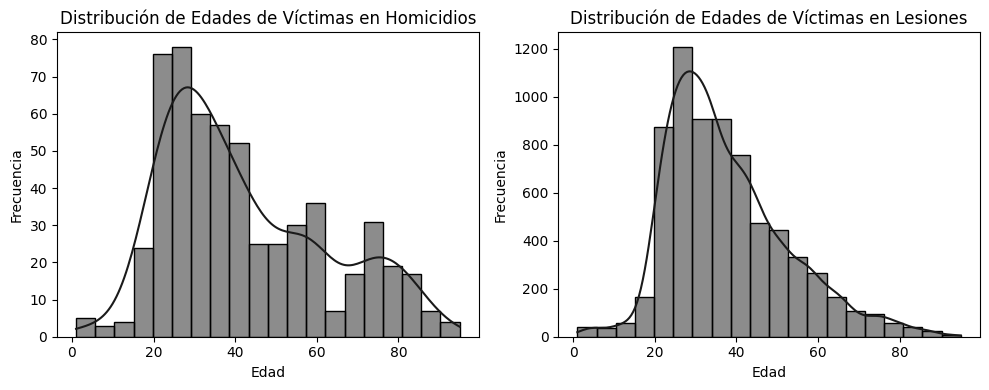

In [324]:
plt.figure(figsize=(10, 4))

# Visualizamos la distribución de edades de las víctimas de homicidios
plt.subplot(1, 2, 1)
sns.histplot(homicidios_merge['EDAD_VICTIMA'], bins=20, kde=True, color=[0.1, 0.1, 0.1])
plt.title('Distribución de Edades de Víctimas en Homicidios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Visualizar la distribución de edades de las víctimas de lesiones
plt.subplot(1, 2, 2)
sns.histplot(lesiones_merge['EDAD_VICTIMA'], bins=20, kde=True, color=[0.1, 0.1, 0.1])
plt.title('Distribución de Edades de Víctimas en Lesiones')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Evitamos superposiciones
plt.tight_layout()

plt.show()

### Distribución de edades de víctimas en homicidios y lesiones

El gráfico de la izquierda es un histograma que muestra la frecuencia de víctimas fatales por grupo de edad.
El gráfico de la derecha es un histograma que muestra la frecuencia de víctimas lesionadas por grupo de edad.

Los gráficos muestran que la mayoría de las víctimas, tanto de homicidios como de lesiones, tienen entre 20 y 39 años. El grupo de edad con mayor frecuencia es el de 25 a 29 años. El siguiente grupo de edad con mayor frecuencia es el de 30 a 34 años.
La frecuencia de víctimas disminuye gradualmente con la edad. El grupo de edad con menor frecuencia es el de 60 a 69 años.

Los gráficos también muestran que la distribución de edades de las víctimas es sesgada hacia la derecha. Esto significa que hay más víctimas en los grupos de edad más jóvenes que en los grupos de edad más viejos.

**Conclusiones:**
- Los jóvenes son los más afectados por los homicidios y lesiones en siniestros viales en la Ciudad de Buenos Aires.
- Los siniestros son más frecuentes entre los jóvenes de 20 a 39 años.
- La distribución de edades de las víctimas es sesgada hacia la derecha.

In [325]:
# Calculamos la media de edad en homicidios
media_edad_homicidios = homicidios_merge['EDAD_VICTIMA'].mean()
print(f"Media de Edad en Homicidios: {media_edad_homicidios:.2f}")
# Calculamos la media de edad en lesiones
media_edad_lesiones = lesiones_merge['EDAD_VICTIMA'].mean()
print(f"Media de Edad en Lesiones: {media_edad_lesiones:.2f}")

# Calcularmos la moda de edad en homicidios
moda_edad_homicidios = homicidios_merge['EDAD_VICTIMA'].mode()
print(f"Moda de Edad en Homicidios: {moda_edad_homicidios.iloc[0]}")
# Calculamos la moda de edad en lesiones
moda_edad_lesiones = lesiones_merge['EDAD_VICTIMA'].mode()
print(f"Moda de Edad en Lesiones: {moda_edad_lesiones.iloc[0]}")


Media de Edad en Homicidios: 42.22
Media de Edad en Lesiones: 37.60
Moda de Edad en Homicidios: 30.0
Moda de Edad en Lesiones: 29.0


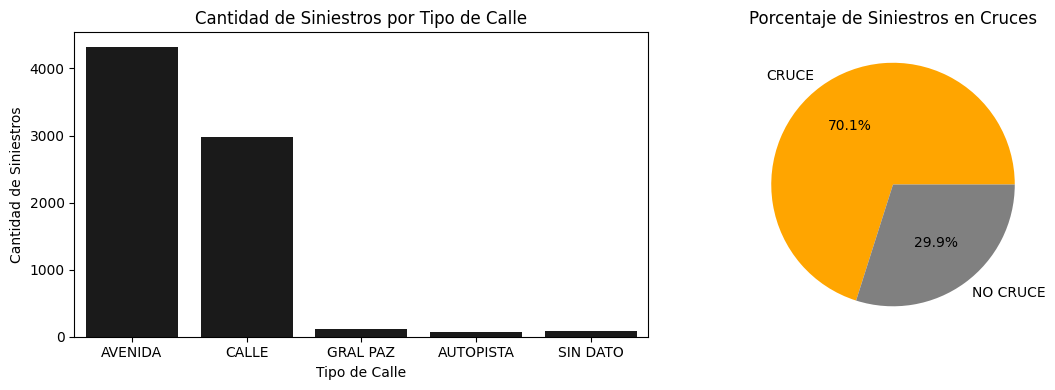

In [326]:
# GRAFICO 1
# Creamos una copia del DataFrame siniestros para editarlo únicamente para este gráfico.
tipo_calle = siniestros_sin_duplicados.copy()
# Editamos el DataFrame 'tipo_calle' para poder graficarlo.
tipo_calle['TIPO_DE_CALLE'] = tipo_calle['TIPO_DE_CALLE'].fillna('SIN DATO')

# Relacionamos el tipo de calle con la cantidad de siniestros.
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x='TIPO_DE_CALLE', data=tipo_calle, color=[0.1, 0.1, 0.1])
plt.title('Cantidad de Siniestros por Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad de Siniestros')

# GRAFICO 2
# Contamos las filas con datos completos en las columnas 'CRUCE' y 'ALTURA'
cantidad_cruce = 0
for dato in siniestros_sin_duplicados['CRUCE']:
    if type(dato) == str:
        cantidad_cruce += 1
    else:
        continue
 
cantidad_altura = 0
for dato in siniestros_sin_duplicados['ALTURA']:
    if dato != 0:
        cantidad_altura += 1
    else:
        continue

# Obtenemos el total de filas
total_filas = cantidad_cruce + cantidad_altura

# Calculamos porcentajes
porcentaje_cruce = cantidad_cruce / total_filas * 100
porcentaje_altura = cantidad_altura / total_filas * 100

# Creamos un gráfico de pastel con los datos de CRUCE
plt.subplot(1, 2, 2)
sizes = [cantidad_cruce, cantidad_altura]
labels = ['CRUCE', 'NO CRUCE']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', [0.5, 0.5, 0.5]])
plt.title('Porcentaje de Siniestros en Cruces')

plt.tight_layout()
plt.show()

### Cantidad de Siniestros por Tipo de Calle

El gráfico de barras muestra la distribución de la cantidad de siniestros viales ocurridos en la Ciudad de Buenos Aires según el tipo de calle donde ocurrieron. Se observa que la mayoría de los siniestros ocurrieron en avenidas, con una cifra superior a 5000. En segundo lugar se encuentran las calles, seguidas por la Av. General Paz y, por último, las autopistas.

Se puede inferir que las avenidas son las vías más peligrosas. Sin embargo, es importante tener en cuenta varios factores antes de sacar conclusiones definitivas:

- Densidad de tráfico: Es probable que las avenidas tengan mayor flujo vehicular que las calles o autopistas, lo que incrementa la probabilidad de que se produzcan accidentes.
- Velocidad permitida: En las avenidas, está permitido circular a velocidades más altas que en las calles, por lo que se necesita mayor tiempo de frenado.
- Diseño de la vía: Las autopistas, a pesar de las altas velocidades permitidas, no tienen posibilidad de cruzarse a carriles contrarios y, además, no tienen cruces, suelen tener rotondas y rulos de ingreso, lo que minimiza la probabilidad de accidentes y las hace más seguras. 
- Personas que circulan: Las avenidas y calles suelen tener mayor cantidad de motocicletas, ciclistas y peatones transitando, lo que aumenta la probabilidad de atropellos y siniestros que los involucren.

### Porcentaje de Siniestros en Cruces

El gráfico circular muestra el porcentaje de siniestros que ocurrieron en cruces, en comparación con los que sucedieron en tramos sin cruce. Se observa que el 70.5% de los siniestros ocurrieron en cruces, mientras que el 29.5% restante sucedieron en tramos sin cruce.

Estos datos parecen indicar que las intersecciones viales son puntos focales donde se concentran los accidentes de tránsito en la Ciudad de Buenos Aires. Esto podría deberse a varias razones:

- Falta de precaución al cruzar o conducir: Los conductores y peatones deben estar especialmente atentos y respetar las señales de tránsito en las intersecciones para evitar accidentes.
- Diseño deficiente de las intersecciones: Algunas intersecciones pueden tener un diseño confuso o carecer de la señalización adecuada, lo que puede provocar confusión y aumentar el riesgo de accidentes.
- Mayor afluencia de vehículos y peatones: Las intersecciones suelen ser puntos donde convergen varias calles y avenidas, lo que incrementa el número de vehículos y peatones que transitan por la zona, aumentando la probabilidad de que se produzcan accidentes.

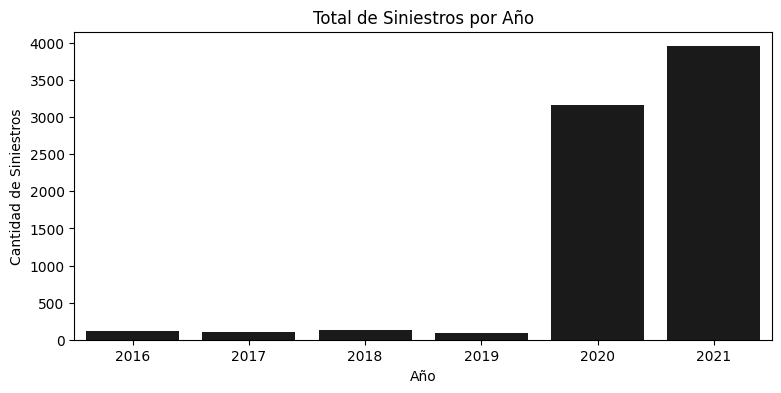

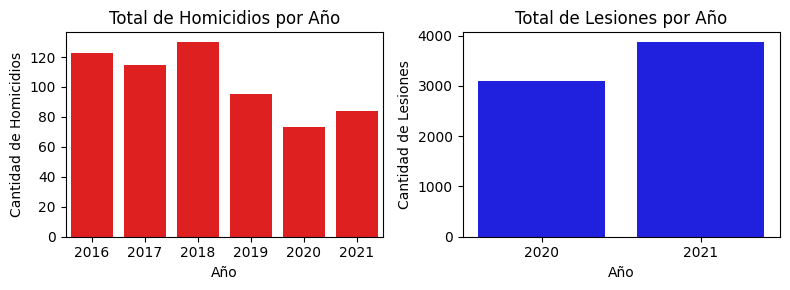

In [327]:
# Comparamos la cantidad de siniestros por cada año
plt.figure(figsize=(9, 4))
sns.countplot(x='AAAA', data=siniestros_sin_duplicados, color=[0.1,0.1,0.1])
plt.title('Total de Siniestros por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Siniestros')
plt.show()

# Separamos el gráfico de siniestros por homicidios y lesiones
plt.figure(figsize=(8, 3))

# Homicidios
plt.subplot(1, 2, 1)
sns.countplot(x='AAAA', data=homicidios_merge, color=[1,0,0])
plt.title('Total de Homicidios por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Homicidios')

# Lesiones
plt.subplot(1, 2, 2)
sns.countplot(x='AAAA', data=lesiones_sin_duplicados, color=[0,0,1])
plt.title('Total de Lesiones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lesiones')


plt.tight_layout()
plt.show()

### Cantidad de Siniestros por Año

A simple vista, viendo el gráfico que engloba todos los siniestros, parece que los mismos se incrementaron considerablemente en los años 2020 y 2021, pero cuando desglosamos en homicidios y lesiones, se puede notar que ese incremento se da porque recién hay registros de lesiones a partir de 2020, antes de ese año no se los tenía en cuenta.

En el gráfico de homicidios se puede notar un decrecimiento de la cantidad de accidentes fatales en los últimos años del análisis. Eso puede deberse a alguna campaña para reducir siniestros viales llevada a cabo por el gobierno. Sin embargo, ese decrecimiento de siniestros también pudo deberse a la gran cantidad de restricciones a la circulación durante la pandemia de COVID-19. Al reducirse el volumen de circulación, se reduce también la probabilidad de que ocurran accidentes.

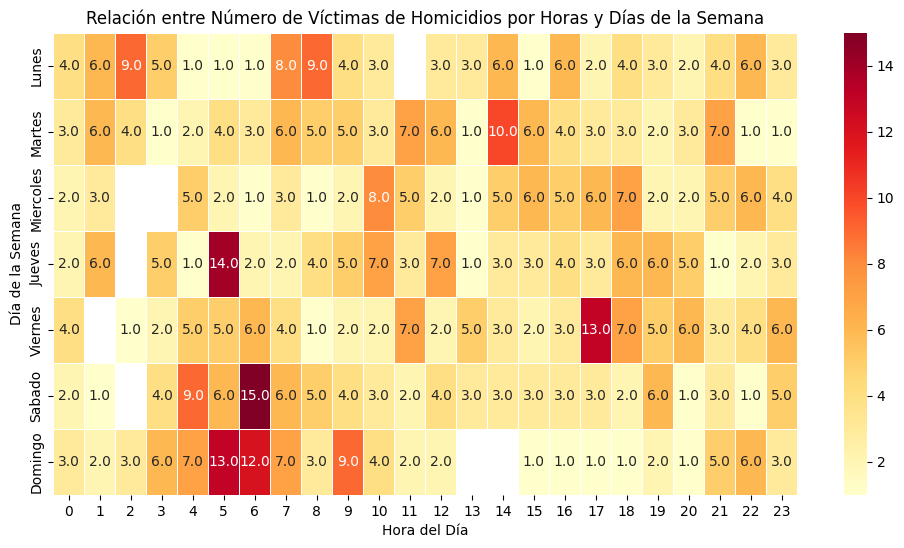

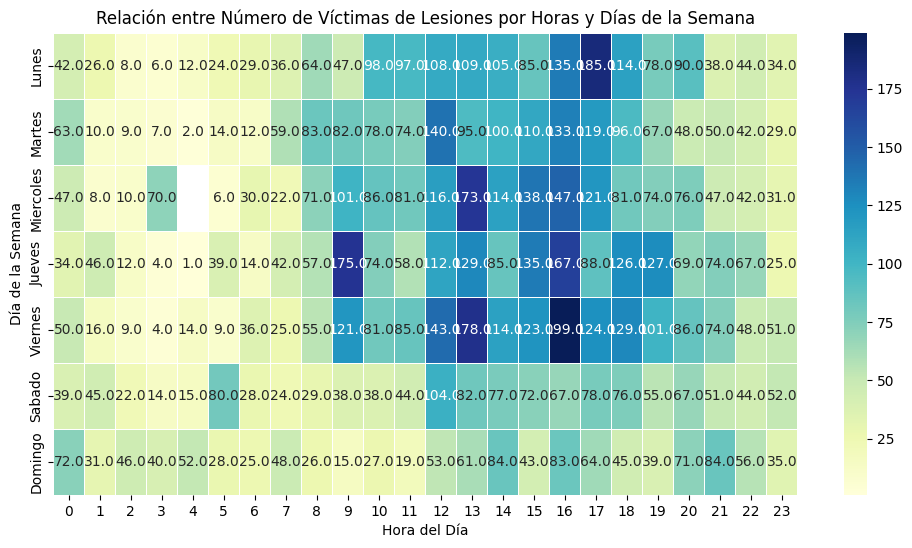

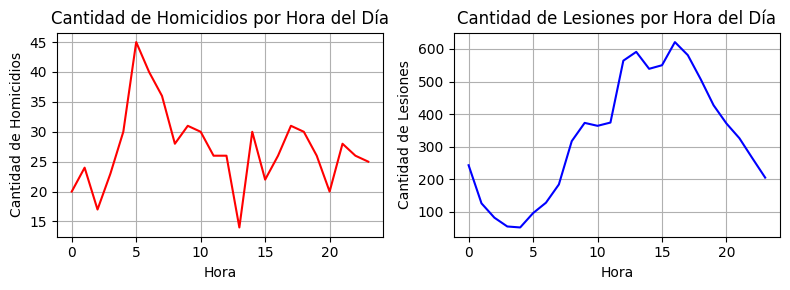

In [328]:
# Agrupamos las victimas de homicidios por dia de la semana y horas, y sumamos el numero de victimas
homicidios_dia = homicidios_merge.groupby(['DIA', "HH"])['N_VICTIMAS'].sum().reset_index()
homicidios_dia["HH"]=homicidios_dia["HH"].astype("Int64")

# Definimos el orden de los días
orden_dia = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]

# Creamos una columna 'ORDEN' en el DataFrame para representar el orden numérico de los días
homicidios_dia['ORDEN'] = homicidios_dia['DIA'].apply(lambda x: orden_dia.index(x))

# Ordenamos el DataFrame según el orden numérico de los días de la semana
homicidios_dia = homicidios_dia.sort_values(by='ORDEN')

# Creamos una tabla pivot para los datos
pivot1 = homicidios_dia.pivot_table(index= 'DIA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
pivot1 = pivot1.reindex(orden_dia)

# Graficamos la relacion entre el número de victimas de homicidios, las horas del día y los días de la semana.
plt.figure(figsize=(12, 6))
sns.heatmap(pivot1, cmap='YlOrRd', annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas de Homicidios por Horas y Días de la Semana')

plt.show()

# Agrupamos las victimas de lesiones por dia de la semana y horas, y sumamos el numero de victimas
lesiones_dia = lesiones_merge.groupby(['DIA', "HH"])['N_VICTIMAS'].sum().reset_index()
lesiones_dia["HH"]=lesiones_dia["HH"].astype("Int64")

# Creamos una columna 'ORDEN' en el DataFrame para representar el orden numérico de los días
lesiones_dia['ORDEN'] = lesiones_dia['DIA'].apply(lambda x: orden_dia.index(x))

# Ordenamos el DataFrame según el orden numérico de los días de la semana
lesiones_dia = lesiones_dia.sort_values(by='ORDEN')

# Creamos una tabla pivot para los datos
pivot2 = lesiones_dia.pivot_table(index= 'DIA', columns='HH', values='N_VICTIMAS', aggfunc='sum')
pivot2 = pivot2.reindex(orden_dia)

# Graficamos la relacion entre el número de victimas de lesiones, las horas del día y los días de la semana.
plt.figure(figsize=(12, 6))
sns.heatmap(pivot2, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas de Lesiones por Horas y Días de la Semana')

plt.show()

# Agrupamos la cantidad de victimas por hora y sumamos el numero de victimas
total_homicidios_por_hh = homicidios_merge.groupby('HH')['N_VICTIMAS'].sum().reset_index()
total_lesiones_por_hh = lesiones_sin_duplicados.groupby('HH')['N_VICTIMAS'].sum().reset_index()

# Cambiamos el tipo de dato de la columna 'HH' a entero
total_homicidios_por_hh['HH'] = total_homicidios_por_hh['HH'].astype(int)
total_lesiones_por_hh['HH'] = total_lesiones_por_hh['HH'].astype(int)

plt.figure(figsize=(8, 3))

# Graficamos la cantidad de homicidios por cada una de las horas del día
plt.subplot(1, 2, 1)
plt.plot('HH', 'N_VICTIMAS', data=total_homicidios_por_hh, color='red')
plt.title('Cantidad de Homicidios por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Homicidios')
plt.grid(True)

# Graficamos la cantidad de lesiones por cada una de las horas del día
plt.subplot(1, 2, 2)
plt.plot('HH', 'N_VICTIMAS', data=total_lesiones_por_hh, color='blue')
plt.title('Cantidad de Lesiones por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Cantidad de Lesiones')
plt.grid(True)

plt.tight_layout()
plt.show()

### Cantidad de Accidentes por Hora del Día

Los accidentes fatales son más comunes entre las 5 y las 7 de la mañana.

Los accidentes no fatales son más comunes entre las 12 del mediodía y las 5 de la tarde. 

Este análisis proporciona información importante sobre los momentos del día en los que es más probable que ocurran accidentes, lo que puede ayudar a desarrollar estrategias de prevención específicas. 

Según el comportamiento de los gráficos, podemos llegar a conclusiones como las siguientes:

- La mayor cantidad de accidentes no fatales ocurren los días de semana a la tarde, cuando hay mayor tránsito en las llamadas "Horas Pico".

- La mayor cantidad de accidentes fatales se dan los fines de semana a horas de la madrugada, cuando cierran los bares o clubes bailables, donde es mas probable encontrar conductores con altos niveles de alcohol en sangre y manejando a altas velocidades.

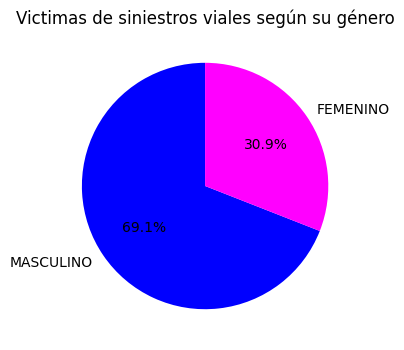

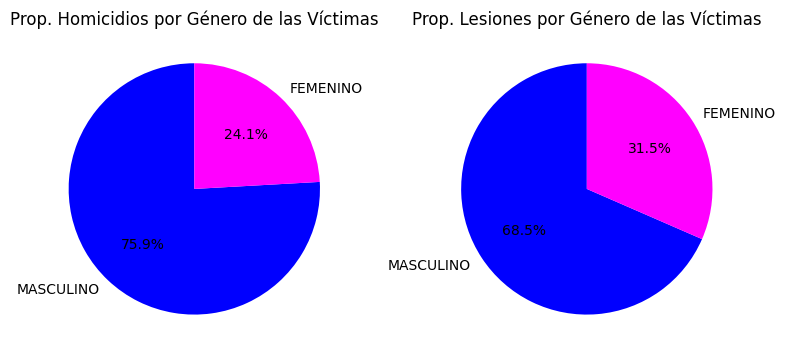

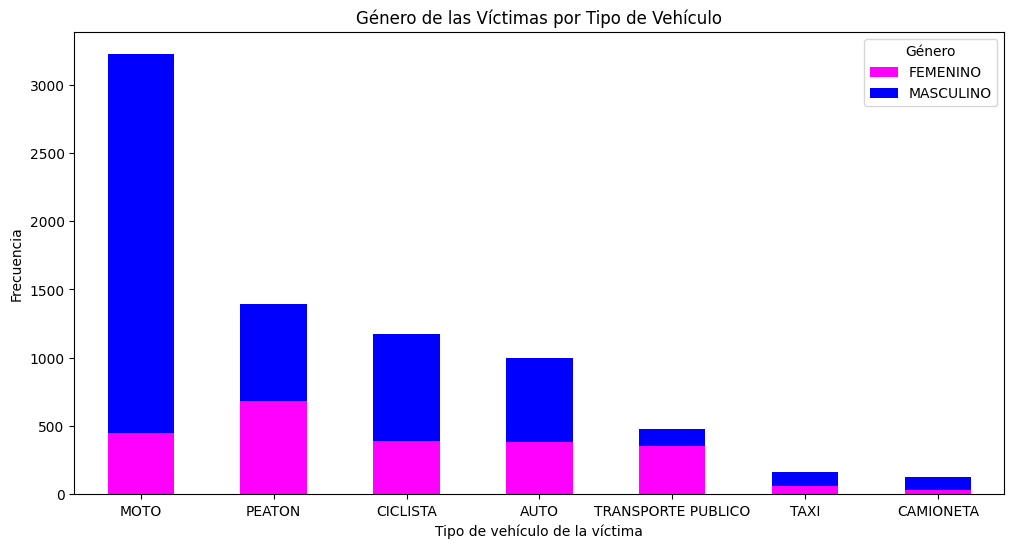

In [329]:
# Comparamos la cantidad de accidentes por género de las víctimas
plt.figure(figsize=(4, 4))
siniestros_por_genero = siniestros['SEXO_VICTIMA'].value_counts()
plt.pie(siniestros_por_genero, labels=siniestros_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'magenta'])
plt.title('Victimas de siniestros viales según su género')
plt.show()

# Separamos el gráfico de siniestros por homicidios y lesiones
plt.figure(figsize=(8, 6))

# Homicidios
plt.subplot(1, 2, 1)
homicidios_por_genero = homicidios_merge['SEXO_VICTIMA'].value_counts()
plt.pie(homicidios_por_genero, labels=homicidios_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'magenta'])
plt.title('Prop. Homicidios por Género de las Víctimas')

# Lesiones
plt.subplot(1, 2, 2)
lesiones_por_genero = lesiones_merge['SEXO_VICTIMA'].value_counts()
plt.pie(lesiones_por_genero, labels=lesiones_por_genero.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'magenta'])
plt.title('Prop. Lesiones por Género de las Víctimas')

plt.tight_layout()
plt.show()


# Calculamos las frecuencias de cada tipo de vehículo
frecuencias_tipo_vehiculo = siniestros['VICTIMA'].value_counts()

# Seleccionamos los 7 tipos de vehículos con mayor frecuencia
top_7_tipos_vehiculo = frecuencias_tipo_vehiculo.head(7).index

# Filtramos el DataFrame original para incluir solo los 7 tipos de vehículos
siniestros_top_7 = siniestros[siniestros['VICTIMA'].isin(top_7_tipos_vehiculo)]

# Creamos una tabla de contingencia con los 7 tipos de vehículos. Relacionando el tipo de vehículo con el género
tabla_cont = pd.crosstab(siniestros_top_7['VICTIMA'], siniestros_top_7['SEXO_VICTIMA'])

# Ordenamos la tabla de contingencia por la frecuencia total
tabla_cont = tabla_cont.loc[tabla_cont.sum(axis=1).sort_values(ascending=False).index]

# Graficamos
ax = tabla_cont.plot(kind='bar', stacked=True, figsize=(12, 6), color=["magenta", 'blue'])
plt.title('Género de las Víctimas por Tipo de Vehículo')
plt.xlabel('Tipo de vehículo de la víctima')
plt.ylabel('Frecuencia')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=['FEMENINO', 'MASCULINO'], title='Género')

plt.xticks(rotation=0)
plt.show()

### Género de las Víctimas de Siniestros Viales

Podemos observar que la mayoría de las víctimas de siniestros viales, tanto fatales como no fatales, coresponden a varones.

Los hombres tienen más probabilidades de conducir vehículos motorizados, especialmente motocicletas. Además, los hombres tienen más probabilidades de participar en comportamientos de riesgo al volante, como conducir a altas velocidades o conducir bajo los efectos del alcohol o las drogas.

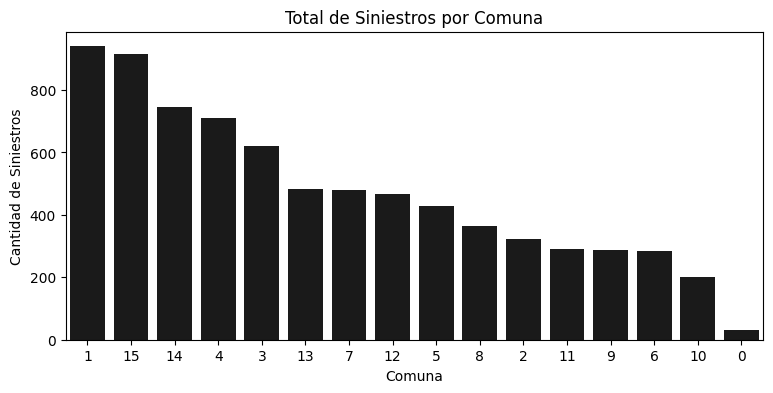

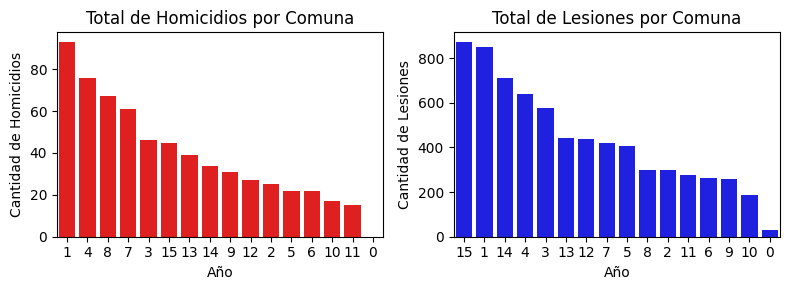

In [330]:
# Comparamos la cantidad de siniestros por comuna de la ciudad
plt.figure(figsize=(9, 4))
sns.countplot(x='COMUNA', data=siniestros_sin_duplicados, order=siniestros_sin_duplicados['COMUNA'].value_counts().index, color=[0.1,0.1,0.1])
plt.title('Total de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Siniestros')
plt.show()

# Separamos el gráfico de siniestros por homicidios y lesiones
plt.figure(figsize=(8, 3))

# Homicidios
plt.subplot(1, 2, 1)
sns.countplot(x='COMUNA', data=homicidios_merge, order=homicidios_merge['COMUNA'].value_counts().index, color=[1,0,0])
plt.title('Total de Homicidios por Comuna')
plt.xlabel('Año')
plt.ylabel('Cantidad de Homicidios')

# Lesiones
plt.subplot(1, 2, 2)
sns.countplot(x='COMUNA', data=lesiones_sin_duplicados, order=lesiones_sin_duplicados['COMUNA'].value_counts().index, color=[0,0,1])
plt.title('Total de Lesiones por Comuna')
plt.xlabel('Año')
plt.ylabel('Cantidad de Lesiones')


plt.tight_layout()
plt.show()

### Cantidad de Accidentes por Comuna Porteña
	
la comuna con mayor cantidad de accidentes es la número 1, que corresponde a los barrios de Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución. Ésta encabeza la lista de comuna con la mayor cantidad de accidentes fatales y está en segundo lugar del podio de mayor cantidad de accidentes no fatales, superada únicamente por la comuna número 15, que corresponde a los barrios de Chacarita, Villa Crespo, La Paternal, Villa Ortúzar, Agronomía y Parque Chas.


## **Carga de los datos**

Convertimos los DataFrames `homicidios_merge` y `lesiones_merge` en archivos de Excel

In [331]:
homicidios_merge.to_excel('Datos de trabajo\\homicidios_merge.xlsx', index=False)
lesiones_merge.to_excel('Datos de trabajo\\lesiones_merge.xlsx', index=False)
lesiones_sin_duplicados.to_excel('Datos de trabajo\\lesiones_sin_duplicados.xlsx', index=False)
siniestros.to_excel('Datos de trabajo\\total_siniestros.xlsx', index=False)
siniestros_sin_duplicados.to_excel('Datos de trabajo\\siniestros_sin_duplicados.xlsx', index=False)
